## Import libraries

In [2]:
# !pip install imblearn

import pandas as pd
# from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from flaml import AutoML
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

## Import data

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## EDA

In [ ]:
profile = ProfileReport(df, minimal=True)
profile.to_file("bankruptcy_report.html")

## Modelling

In [4]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. baseline model
The baseline model is generated by automl by minimize (1-F1 score)


model: LGBMClassifier(colsample_bytree=0.7308432884723635, learning_rate=0.2051645358815236, max_bin=63, min_child_samples=2, n_estimators=7, num_leaves=12, reg_alpha=0.0009765625, reg_lambda=0.03389686404605889, verbose=-1)

In [8]:
# automl_base = AutoML()
# automl_base.fit(X_train, y_train, task="classification", metric = 'f1',time_budget=60)

# Usage of saved model
filename = "saved_models/baseline_model.joblib"
automl_base = joblib.load(filename)
pred_base = automl_base.predict(X_test)

Baseline model accuracy:  0.9609062638827188


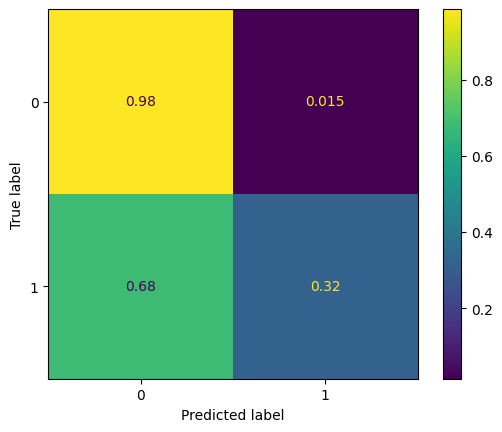

In [13]:
print("Baseline model accuracy: ", accuracy_score(y_test, pred_base))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### 2. minimize 1 - average_precision_score (ap)
model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=[],
              colsample_bylevel=0.745368738598104, colsample_bynode=1,
              colsample_bytree=0.8129633451144613, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='lossguide', importance_type=None,
              interaction_constraints='', learning_rate=0.07078721867651964,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=0, max_leaves=54,
              min_child_weight=0.12634605043266778, missing=nan,
              monotone_constraints='()', n_estimators=21, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
automl_model_2 = AutoML()
automl_model_2.fit(X_train, y_train, task="classification", metric = 'ap',time_budget=60)


# Usage of saved model
filename = "saved_models/automl_model_2.joblib"
joblib.dump(automl_model_2, filename)
automl_model_2 = joblib.load(filename)

pred_model_2 = automl_model_2.predict(X_test)

[flaml.automl: 02-05 16:20:01] {2599} INFO - task = classification
[flaml.automl: 02-05 16:20:01] {2601} INFO - Data split method: stratified
[flaml.automl: 02-05 16:20:01] {2604} INFO - Evaluation method: holdout
[flaml.automl: 02-05 16:20:01] {2726} INFO - Minimizing error metric: 1-ap
[flaml.automl: 02-05 16:20:01] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-05 16:20:01] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-05 16:20:01] {3296} INFO - Estimated sufficient time budget=579s. Estimated necessary time budget=13s.
[flaml.automl: 02-05 16:20:01] {3343} INFO -  at 0.2s,	estimator lgbm's best error=0.5900,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:01] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-05 16:20:01] {3343} INFO -  at 0.3s,	estimator lgbm's best error=0.5900,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:

[flaml.automl: 02-05 16:20:02] {3166} INFO - iteration 29, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:02] {3343} INFO -  at 1.8s,	estimator xgboost's best error=0.6786,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:02] {3166} INFO - iteration 30, current learner lgbm
[flaml.automl: 02-05 16:20:02] {3343} INFO -  at 1.9s,	estimator lgbm's best error=0.5900,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:02] {3166} INFO - iteration 31, current learner lgbm
[flaml.automl: 02-05 16:20:02] {3343} INFO -  at 1.9s,	estimator lgbm's best error=0.5900,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:02] {3166} INFO - iteration 32, current learner lgbm
[flaml.automl: 02-05 16:20:02] {3343} INFO -  at 1.9s,	estimator lgbm'

[flaml.automl: 02-05 16:20:04] {3343} INFO -  at 3.6s,	estimator lgbm's best error=0.5900,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:04] {3166} INFO - iteration 62, current learner extra_tree
[flaml.automl: 02-05 16:20:04] {3343} INFO -  at 3.7s,	estimator extra_tree's best error=0.6361,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:04] {3166} INFO - iteration 63, current learner extra_tree
[flaml.automl: 02-05 16:20:04] {3343} INFO -  at 3.8s,	estimator extra_tree's best error=0.6361,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:04] {3166} INFO - iteration 64, current learner lgbm
[flaml.automl: 02-05 16:20:04] {3343} INFO -  at 3.8s,	estimator lgbm's best error=0.5900,	best estimator lgbm's best error=0.5900
[flaml.automl: 02-05 16:20:04] {3166} INFO - iteration 65, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is de

/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:06] {3343} INFO -  at 5.7s,	estimator xgboost's best error=0.5241,	best estimator xgboost's best error=0.5241
[flaml.automl: 02-05 16:20:06] {3166} INFO - iteration 95, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:06] {3343} INFO -  at 5.8s,	estimator xgboost's best error=0.5241,	best estimator xgboost's best error=0.5241
[flaml.automl: 02-05 16:20:06] {3166} INFO - iteration 96, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated 

[flaml.automl: 02-05 16:20:08] {3343} INFO -  at 7.8s,	estimator lgbm's best error=0.5900,	best estimator xgboost's best error=0.5241
[flaml.automl: 02-05 16:20:08] {3166} INFO - iteration 119, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:08] {3343} INFO -  at 7.9s,	estimator xgboost's best error=0.5241,	best estimator xgboost's best error=0.5241
[flaml.automl: 02-05 16:20:08] {3166} INFO - iteration 120, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:08] {3343} INFO -  at 8.0s,	estimator xgboost's best error=0.5241,	best estimator xgboost's best error=0.5241
[f

[flaml.automl: 02-05 16:20:10] {3343} INFO -  at 9.9s,	estimator xgboost's best error=0.4978,	best estimator xgboost's best error=0.4978
[flaml.automl: 02-05 16:20:10] {3166} INFO - iteration 143, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:11] {3343} INFO -  at 10.1s,	estimator xgboost's best error=0.4978,	best estimator xgboost's best error=0.4978
[flaml.automl: 02-05 16:20:11] {3166} INFO - iteration 144, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:11] {3343} INFO -  at 10.2s,	estimator xgboost's best error=0.4978,	best estimator xgboost's best error=0.49

[flaml.automl: 02-05 16:20:14] {3166} INFO - iteration 168, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:14] {3343} INFO -  at 13.4s,	estimator xgboost's best error=0.4523,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:14] {3166} INFO - iteration 169, current learner lgbm
[flaml.automl: 02-05 16:20:14] {3343} INFO -  at 13.4s,	estimator lgbm's best error=0.5749,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:14] {3166} INFO - iteration 170, current learner rf
[flaml.automl: 02-05 16:20:14] {3343} INFO -  at 13.5s,	estimator rf's best error=0.6595,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:14] {3166} INFO - iteration 171, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/sit

[flaml.automl: 02-05 16:20:20] {3166} INFO - iteration 190, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:20] {3343} INFO -  at 20.0s,	estimator xgb_limitdepth's best error=0.5691,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:21] {3166} INFO - iteration 191, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:21] {3343} INFO -  at 20.2s,	estimator xgboost's best error=0.4523,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:21] {3166} INFO - iteration 192, current learner xgb_limitdepth
/Users/zhancan/.pyenv/version

[flaml.automl: 02-05 16:20:25] {3343} INFO -  at 24.1s,	estimator lgbm's best error=0.4962,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:25] {3166} INFO - iteration 216, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:25] {3343} INFO -  at 24.3s,	estimator xgb_limitdepth's best error=0.5691,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:25] {3166} INFO - iteration 217, current learner lgbm
[flaml.automl: 02-05 16:20:25] {3343} INFO -  at 24.4s,	estimator lgbm's best error=0.4962,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:25] {3166} INFO - iteration 218, current learner lgbm
[flaml.automl: 02-05 16:20:25] {3343} INFO -  at 24.5s,	estimator lgbm's best error=0.4962,	best estimator xgboost's best

[flaml.automl: 02-05 16:20:30] {3343} INFO -  at 29.8s,	estimator xgboost's best error=0.4523,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:30] {3166} INFO - iteration 243, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:20:31] {3343} INFO -  at 30.4s,	estimator lrl1's best error=0.9544,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:31] {3166} INFO - iteration 244, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:20:31] {3343} INFO -  at 30.9s,	estimator lrl1's best error=0.9544,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:3

[flaml.automl: 02-05 16:20:38] {3343} INFO -  at 38.0s,	estimator xgb_limitdepth's best error=0.5228,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:38] {3166} INFO - iteration 264, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:39] {3343} INFO -  at 38.3s,	estimator xgboost's best error=0.4523,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:39] {3166} INFO - iteration 265, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:39] {3343} INFO -  at 38.4s,	estimator xgb_limitdepth's best error=0.5228,	best estimator xgb

[flaml.automl: 02-05 16:20:44] {3166} INFO - iteration 285, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:20:45] {3343} INFO -  at 44.2s,	estimator lrl1's best error=0.9544,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:45] {3166} INFO - iteration 286, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:20:45] {3343} INFO -  at 44.7s,	estimator lrl1's best error=0.9544,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:45] {3166} INFO - iteration 287, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_mode

[flaml.automl: 02-05 16:20:51] {3343} INFO -  at 50.2s,	estimator xgboost's best error=0.4523,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:51] {3166} INFO - iteration 306, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:20:51] {3343} INFO -  at 50.8s,	estimator lrl1's best error=0.9544,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:51] {3166} INFO - iteration 307, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:20:52] {3343} INFO -  at 51.4s,	estimator lrl1's best error=0.9544,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:5

[flaml.automl: 02-05 16:20:59] {3343} INFO -  at 58.5s,	estimator extra_tree's best error=0.6109,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:59] {3166} INFO - iteration 327, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:59] {3343} INFO -  at 58.6s,	estimator xgb_limitdepth's best error=0.5228,	best estimator xgboost's best error=0.4523
[flaml.automl: 02-05 16:20:59] {3166} INFO - iteration 328, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:20:59] {3343} INFO -  at 58.8s,	estimator xgboost's best error=0.4523,	best estimator xgboost

Model-2 accuracy:  0.965792980897379


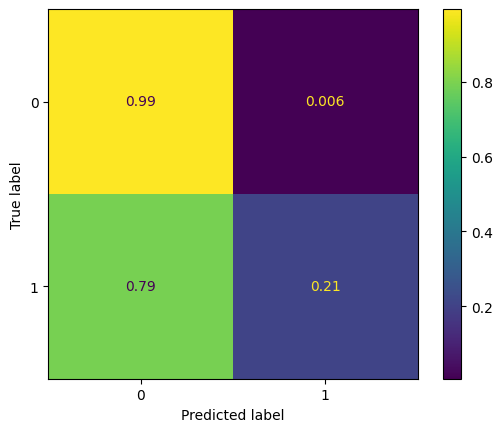

In [25]:
cm = confusion_matrix(y_test, pred_model_2, normalize="true")
print("Model-2 accuracy: ", accuracy_score(y_test, pred_model_2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### 3. minimize 1 - f1_score with average="macro"
model:  LGBMClassifier(colsample_bytree=0.7308432884723635,
               learning_rate=0.2051645358815236, max_bin=63,
               min_child_samples=2, n_estimators=7, num_leaves=12,
               reg_alpha=0.0009765625, reg_lambda=0.03389686404605889,
               verbose=-1)

In [26]:
automl_model_3 = AutoML()
automl_model_3.fit(X_train, y_train, task="classification", metric = 'macro_f1',time_budget=60)


# Usage of saved model
filename = "saved_models/automl_model_3.joblib"
joblib.dump(automl_model_3, filename)
automl_model_3 = joblib.load(filename)

pred_model_3 = automl_model_3.predict(X_test)

[flaml.automl: 02-05 16:23:38] {2599} INFO - task = classification
[flaml.automl: 02-05 16:23:38] {2601} INFO - Data split method: stratified
[flaml.automl: 02-05 16:23:38] {2604} INFO - Evaluation method: holdout
[flaml.automl: 02-05 16:23:38] {2726} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl: 02-05 16:23:38] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-05 16:23:38] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-05 16:23:38] {3296} INFO - Estimated sufficient time budget=542s. Estimated necessary time budget=12s.
[flaml.automl: 02-05 16:23:38] {3343} INFO -  at 0.2s,	estimator lgbm's best error=0.5083,	best estimator lgbm's best error=0.5083
[flaml.automl: 02-05 16:23:38] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-05 16:23:38] {3343} INFO -  at 0.3s,	estimator lgbm's best error=0.5083,	best estimator lgbm's best error=0.5083
[flaml.automl: 02-

[flaml.automl: 02-05 16:23:39] {3166} INFO - iteration 33, current learner extra_tree
[flaml.automl: 02-05 16:23:40] {3343} INFO -  at 2.0s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2995
[flaml.automl: 02-05 16:23:40] {3166} INFO - iteration 34, current learner lgbm
[flaml.automl: 02-05 16:23:40] {3343} INFO -  at 2.0s,	estimator lgbm's best error=0.2995,	best estimator lgbm's best error=0.2995
[flaml.automl: 02-05 16:23:40] {3166} INFO - iteration 35, current learner rf
[flaml.automl: 02-05 16:23:40] {3343} INFO -  at 2.1s,	estimator rf's best error=0.4495,	best estimator lgbm's best error=0.2995
[flaml.automl: 02-05 16:23:40] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 02-05 16:23:40] {3343} INFO -  at 2.1s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2995
[flaml.automl: 02-05 16:23:40] {3166} INFO - iteration 37, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/s

[flaml.automl: 02-05 16:23:42] {3166} INFO - iteration 69, current learner extra_tree
[flaml.automl: 02-05 16:23:42] {3343} INFO -  at 4.4s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:42] {3166} INFO - iteration 70, current learner extra_tree
[flaml.automl: 02-05 16:23:42] {3343} INFO -  at 4.4s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:42] {3166} INFO - iteration 71, current learner extra_tree
[flaml.automl: 02-05 16:23:42] {3343} INFO -  at 4.5s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:42] {3166} INFO - iteration 72, current learner extra_tree
[flaml.automl: 02-05 16:23:42] {3343} INFO -  at 4.5s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:42] {3166} INFO - iteration 73, current learner extra_tree
[flaml.automl: 02-05 1

[flaml.automl: 02-05 16:23:45] {3166} INFO - iteration 105, current learner lgbm
[flaml.automl: 02-05 16:23:45] {3343} INFO -  at 7.7s,	estimator lgbm's best error=0.2329,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:45] {3166} INFO - iteration 106, current learner extra_tree
[flaml.automl: 02-05 16:23:45] {3343} INFO -  at 7.9s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:45] {3166} INFO - iteration 107, current learner lgbm
[flaml.automl: 02-05 16:23:46] {3343} INFO -  at 8.1s,	estimator lgbm's best error=0.2329,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:46] {3166} INFO - iteration 108, current learner extra_tree
[flaml.automl: 02-05 16:23:46] {3343} INFO -  at 8.2s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:46] {3166} INFO - iteration 109, current learner extra_tree
[flaml.automl: 02-05 16:23:46] {3343} INF

[flaml.automl: 02-05 16:23:49] {3166} INFO - iteration 142, current learner extra_tree
[flaml.automl: 02-05 16:23:49] {3343} INFO -  at 11.6s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:49] {3166} INFO - iteration 143, current learner extra_tree
[flaml.automl: 02-05 16:23:49] {3343} INFO -  at 11.7s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:49] {3166} INFO - iteration 144, current learner rf
[flaml.automl: 02-05 16:23:49] {3343} INFO -  at 11.8s,	estimator rf's best error=0.3967,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:49] {3166} INFO - iteration 145, current learner lgbm
[flaml.automl: 02-05 16:23:49] {3343} INFO -  at 11.9s,	estimator lgbm's best error=0.2329,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:49] {3166} INFO - iteration 146, current learner lgbm
[flaml.automl: 02-05 16:23:50] {3343} INFO -  a

[flaml.automl: 02-05 16:23:53] {3166} INFO - iteration 170, current learner lgbm
[flaml.automl: 02-05 16:23:53] {3343} INFO -  at 15.1s,	estimator lgbm's best error=0.2329,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:53] {3166} INFO - iteration 171, current learner lgbm
[flaml.automl: 02-05 16:23:53] {3343} INFO -  at 15.1s,	estimator lgbm's best error=0.2329,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:53] {3166} INFO - iteration 172, current learner extra_tree
[flaml.automl: 02-05 16:23:53] {3343} INFO -  at 15.3s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:53] {3166} INFO - iteration 173, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:23:53] {3343} INFO -  a

[flaml.automl: 02-05 16:23:56] {3166} INFO - iteration 197, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:23:56] {3343} INFO -  at 18.7s,	estimator xgb_limitdepth's best error=0.2794,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:56] {3166} INFO - iteration 198, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:23:56] {3343} INFO -  at 18.8s,	estimator xgb_limitdepth's best error=0.2794,	best estimator lgbm's best error=0.2329
[flaml.automl: 02-05 16:23:56] {3166} INFO - iteration 199, current learner xgb_limitdepth
/Users/zhancan/.pyenv

/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:00] {3343} INFO -  at 22.1s,	estimator xgb_limitdepth's best error=0.2794,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:00] {3166} INFO - iteration 223, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:00] {3343} INFO -  at 22.2s,	estimator xgb_limitdepth's best error=0.2794,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:00] {3166} INFO - iteration 224, current learner lgbm
[flaml.automl: 02-05 16:24:00] {3343} INFO -  at 22.3s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best err

[flaml.automl: 02-05 16:24:03] {3166} INFO - iteration 249, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:03] {3343} INFO -  at 25.5s,	estimator xgb_limitdepth's best error=0.2794,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:03] {3166} INFO - iteration 250, current learner extra_tree
[flaml.automl: 02-05 16:24:03] {3343} INFO -  at 25.7s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:03] {3166} INFO - iteration 251, current learner lgbm
[flaml.automl: 02-05 16:24:03] {3343} INFO -  at 25.8s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:03] {3166} INFO - iteration 252, current learner rf
[flaml.automl: 02-05 16:24:03] {3343} I

[flaml.automl: 02-05 16:24:07] {3343} INFO -  at 29.4s,	estimator xgb_limitdepth's best error=0.2567,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:07] {3166} INFO - iteration 280, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:07] {3343} INFO -  at 29.5s,	estimator xgboost's best error=0.3896,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:07] {3166} INFO - iteration 281, current learner lgbm
[flaml.automl: 02-05 16:24:07] {3343} INFO -  at 29.6s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:07] {3166} INFO - iteration 282, current learner lgbm
[flaml.automl: 02-05 16:24:07] {3343} INFO -  at 29.7s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[f

[flaml.automl: 02-05 16:24:10] {3343} INFO -  at 32.7s,	estimator rf's best error=0.3967,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:10] {3166} INFO - iteration 314, current learner lgbm
[flaml.automl: 02-05 16:24:10] {3343} INFO -  at 32.7s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:10] {3166} INFO - iteration 315, current learner extra_tree
[flaml.automl: 02-05 16:24:10] {3343} INFO -  at 32.9s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:10] {3166} INFO - iteration 316, current learner extra_tree
[flaml.automl: 02-05 16:24:11] {3343} INFO -  at 33.0s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:11] {3166} INFO - iteration 317, current learner lgbm
[flaml.automl: 02-05 16:24:11] {3343} INFO -  at 33.1s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0

[flaml.automl: 02-05 16:24:13] {3343} INFO -  at 35.9s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:13] {3166} INFO - iteration 350, current learner rf
[flaml.automl: 02-05 16:24:14] {3343} INFO -  at 36.0s,	estimator rf's best error=0.3967,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:14] {3166} INFO - iteration 351, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:14] {3343} INFO -  at 36.1s,	estimator xgboost's best error=0.3578,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:14] {3166} INFO - iteration 352, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.

[flaml.automl: 02-05 16:24:17] {3343} INFO -  at 39.0s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:17] {3166} INFO - iteration 380, current learner lgbm
[flaml.automl: 02-05 16:24:17] {3343} INFO -  at 39.0s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:17] {3166} INFO - iteration 381, current learner extra_tree
[flaml.automl: 02-05 16:24:17] {3343} INFO -  at 39.1s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:17] {3166} INFO - iteration 382, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:17] {3343} INFO -  at 39.3s,	estimator xgboost's best error=0.3578,	best estimator lgbm's best error=0.2139


[flaml.automl: 02-05 16:24:20] {3343} INFO -  at 42.1s,	estimator xgb_limitdepth's best error=0.2567,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:20] {3166} INFO - iteration 411, current learner lgbm
[flaml.automl: 02-05 16:24:20] {3343} INFO -  at 42.2s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:20] {3166} INFO - iteration 412, current learner lgbm
[flaml.automl: 02-05 16:24:20] {3343} INFO -  at 42.2s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:20] {3166} INFO - iteration 413, current learner lgbm
[flaml.automl: 02-05 16:24:20] {3343} INFO -  at 42.3s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:20] {3166} INFO - iteration 414, current learner lgbm
[flaml.automl: 02-05 16:24:20] {3343} INFO -  at 42.3s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml

[flaml.automl: 02-05 16:24:23] {3343} INFO -  at 45.0s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:23] {3166} INFO - iteration 445, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:23] {3343} INFO -  at 45.2s,	estimator xgboost's best error=0.3578,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:23] {3166} INFO - iteration 446, current learner lgbm
[flaml.automl: 02-05 16:24:23] {3343} INFO -  at 45.3s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:23] {3166} INFO - iteration 447, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 

[flaml.automl: 02-05 16:24:26] {3166} INFO - iteration 472, current learner lgbm
[flaml.automl: 02-05 16:24:26] {3343} INFO -  at 48.4s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:26] {3166} INFO - iteration 473, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:26] {3343} INFO -  at 48.5s,	estimator xgboost's best error=0.3578,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:26] {3166} INFO - iteration 474, current learner lgbm
[flaml.automl: 02-05 16:24:26] {3343} INFO -  at 48.6s,	estimator lgbm's best error=0.2139,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:26] {3166} INFO - iteration 475, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/s

[flaml.automl: 02-05 16:24:30] {3166} INFO - iteration 502, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:24:31] {3343} INFO -  at 53.2s,	estimator lrl1's best error=0.5100,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:31] {3166} INFO - iteration 503, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 02-05 16:24:31] {3343} INFO -  at 53.8s,	estimator lrl1's best error=0.5100,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:31] {3166} INFO - iteration 504, current learner lrl1
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_sag

[flaml.automl: 02-05 16:24:37] {3166} INFO - iteration 528, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:24:37] {3343} INFO -  at 59.9s,	estimator xgb_limitdepth's best error=0.2567,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:37] {3166} INFO - iteration 529, current learner extra_tree
[flaml.automl: 02-05 16:24:38] {3343} INFO -  at 60.0s,	estimator extra_tree's best error=0.5083,	best estimator lgbm's best error=0.2139
[flaml.automl: 02-05 16:24:38] {3602} INFO - retrain lgbm for 0.1s
[flaml.automl: 02-05 16:24:38] {3609} INFO - retrained model: LGBMClassifier(colsample_bytree=0.7308432884723635,
               learning_rate=0.2051645358815236, max_bin=63,
               min_child_samples=2, n_estimators=7, num_leaves=12,
               reg_alp

Model-3 accuracy:  0.9609062638827188


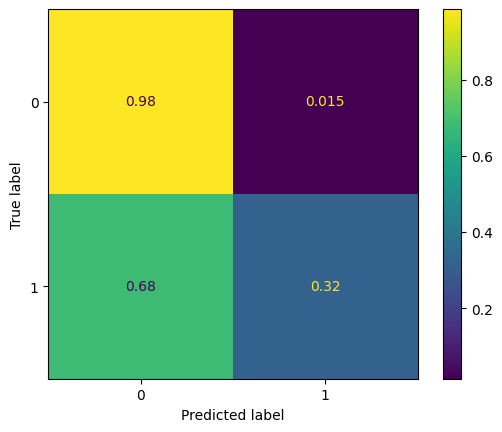

In [28]:
cm = confusion_matrix(y_test, pred_model_3, normalize="true")
print("Model-3 accuracy: ", accuracy_score(y_test, pred_model_3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### 4. add resample strategy

In [29]:
automl_model_4 = AutoML()
automl_model_4.fit(X_train, y_train, task="classification", metric = 'macro_f1', eval_method='cv', n_splits=10)

# Usage of saved model
filename = "saved_models/automl_model_4.joblib"
joblib.dump(automl_model_4, filename)
automl_model_4 = joblib.load(filename)

pred_model_4 = automl_model_4.predict(X_test)

[flaml.automl: 02-05 16:38:02] {2599} INFO - task = classification
[flaml.automl: 02-05 16:38:02] {2601} INFO - Data split method: stratified
[flaml.automl: 02-05 16:38:02] {2604} INFO - Evaluation method: cv
[flaml.automl: 02-05 16:38:02] {2726} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl: 02-05 16:38:02] {2776} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 02-05 16:38:02] {2870} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-05 16:38:02] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 02-05 16:38:06] {3296} INFO - Estimated sufficient time budget=41273s. Estimated necessary time budget=476s.
[flaml.automl: 02-05 16:38:06] {3343} INFO -  at 4.3s,	estimator rf's best error=0.3677,	best estimator rf's best er

/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-05 16:53:44] {3602} INFO - retrain xgboost for 15.4s
[flaml.automl: 02-05 16:53:44] {3609} INFO - retrained model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=[],
              colsample_bylevel=0.9503441844594458, colsample_bynode=1,
              colsample_bytree=0.5703338448066768, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='lossguide', importance_type=None,
              interaction_constraints='', learning_rate=0.002595066436678338,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=0, max_leaves=16651,
              min_child_weight=0.03356567864689129, missing=nan,
        

Model-4 accuracy:  0.9609062638827188


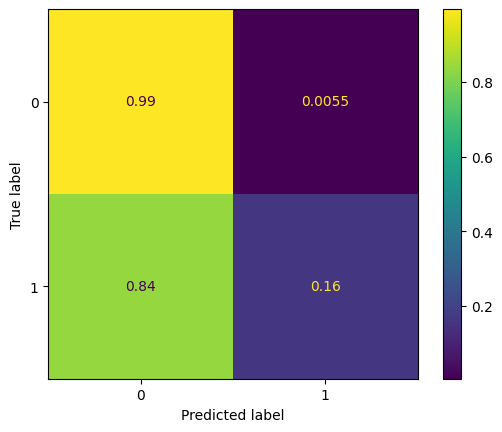

In [30]:
cm = confusion_matrix(y_test, pred_model_4, normalize="true")
print("Model-4 accuracy: ", accuracy_score(y_test, pred_model_3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### 5. use smote to resample
model: LGBMClassifier(colsample_bytree=0.4197282716549872,
               learning_rate=0.24614428984871234, max_bin=127,
               min_child_samples=8, n_estimators=74, num_leaves=162,
               reg_alpha=0.0010836280588796038, reg_lambda=0.002512737399613411,
               verbose=-1)

In [6]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

automl_res = AutoML()
automl_res.fit(X_res, y_res, task="classification", metric = 'f1',time_budget=60)

# Usage of saved model
filename = "saved_models/automl_res.joblib"
joblib.dump(automl_res, filename)
automl_res = joblib.load(filename)
pred_res = automl_res.predict(X_test)

[flaml.automl: 02-06 15:18:36] {2599} INFO - task = classification
[flaml.automl: 02-06 15:18:36] {2601} INFO - Data split method: stratified
[flaml.automl: 02-06 15:18:36] {2604} INFO - Evaluation method: holdout
[flaml.automl: 02-06 15:18:36] {2726} INFO - Minimizing error metric: 1-f1
[flaml.automl: 02-06 15:18:36] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-06 15:18:36] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-06 15:18:36] {3296} INFO - Estimated sufficient time budget=1157s. Estimated necessary time budget=27s.
[flaml.automl: 02-06 15:18:36] {3343} INFO -  at 0.4s,	estimator lgbm's best error=0.1208,	best estimator lgbm's best error=0.1208
[flaml.automl: 02-06 15:18:36] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-06 15:18:36] {3343} INFO -  at 0.5s,	estimator lgbm's best error=0.1079,	best estimator lgbm's best error=0.1079
[flaml.automl: 02-06 15

[flaml.automl: 02-06 15:18:41] {3166} INFO - iteration 31, current learner lgbm
[flaml.automl: 02-06 15:18:41] {3343} INFO -  at 6.0s,	estimator lgbm's best error=0.0149,	best estimator lgbm's best error=0.0149
[flaml.automl: 02-06 15:18:41] {3166} INFO - iteration 32, current learner lgbm
[flaml.automl: 02-06 15:18:43] {3343} INFO -  at 7.2s,	estimator lgbm's best error=0.0131,	best estimator lgbm's best error=0.0131
[flaml.automl: 02-06 15:18:43] {3166} INFO - iteration 33, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-06 15:18:43] {3343} INFO -  at 7.4s,	estimator xgboost's best error=0.0762,	best estimator lgbm's best error=0.0131
[flaml.automl: 02-06 15:18:43] {3166} INFO - iteration 34, current learner lgbm
[flaml.automl: 02-06 15:18:43] {3343} INFO -  at 7.9s,	estimator lgbm'

[flaml.automl: 02-06 15:18:58] {3343} INFO -  at 22.6s,	estimator xgboost's best error=0.0186,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:18:58] {3166} INFO - iteration 63, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-06 15:18:58] {3343} INFO -  at 22.9s,	estimator xgboost's best error=0.0141,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:18:58] {3166} INFO - iteration 64, current learner lgbm
[flaml.automl: 02-06 15:18:59] {3343} INFO -  at 23.3s,	estimator lgbm's best error=0.0084,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:18:59] {3166} INFO - iteration 65, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 

[flaml.automl: 02-06 15:19:06] {3166} INFO - iteration 89, current learner rf
[flaml.automl: 02-06 15:19:06] {3343} INFO -  at 30.9s,	estimator rf's best error=0.0672,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:19:06] {3166} INFO - iteration 90, current learner xgb_limitdepth
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-06 15:19:07] {3343} INFO -  at 31.4s,	estimator xgb_limitdepth's best error=0.0242,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:19:07] {3166} INFO - iteration 91, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-06 15:19:08] {3343} INFO -  at 32.8s,

[flaml.automl: 02-06 15:19:19] {3166} INFO - iteration 115, current learner rf
[flaml.automl: 02-06 15:19:19] {3343} INFO -  at 43.8s,	estimator rf's best error=0.0340,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:19:19] {3166} INFO - iteration 116, current learner rf
[flaml.automl: 02-06 15:19:19] {3343} INFO -  at 44.0s,	estimator rf's best error=0.0340,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:19:19] {3166} INFO - iteration 117, current learner extra_tree
[flaml.automl: 02-06 15:19:20] {3343} INFO -  at 44.2s,	estimator extra_tree's best error=0.0149,	best estimator lgbm's best error=0.0084
[flaml.automl: 02-06 15:19:20] {3166} INFO - iteration 118, current learner xgboost
/Users/zhancan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[flaml.automl: 02-06 15:19:20] {3343} INFO -  at 45.0s,	estima

[flaml.automl: 02-06 15:19:39] {2901} INFO - fit succeeded
[flaml.automl: 02-06 15:19:39] {2902} INFO - Time taken to find the best model: 13.166932821273804


Model (resample with smote) accuracy:  0.9648093841642229


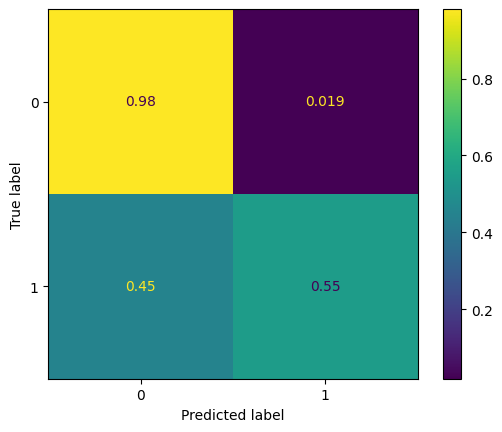

In [7]:
cm = confusion_matrix(y_test, pred_res, normalize="true")
print("Model (resample with smote) accuracy: ", accuracy_score(y_test, pred_res))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()